In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error


import seaborn as sns

sns.set_style('whitegrid')

sns.set_palette('Set2')
sns.color_palette('Set2')

[(0.4, 0.7607843137254902, 0.6470588235294118),
 (0.9882352941176471, 0.5529411764705883, 0.3843137254901961),
 (0.5529411764705883, 0.6274509803921569, 0.796078431372549),
 (0.9058823529411765, 0.5411764705882353, 0.7647058823529411),
 (0.6509803921568628, 0.8470588235294118, 0.32941176470588235),
 (1.0, 0.8509803921568627, 0.1843137254901961),
 (0.8980392156862745, 0.7686274509803922, 0.5803921568627451),
 (0.7019607843137254, 0.7019607843137254, 0.7019607843137254)]

## Create Synthetic Data

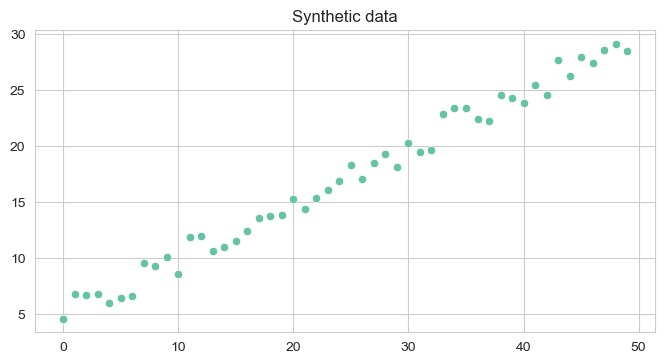

In [6]:
np.random.seed(42)

n = 50
x = np.arange(n)
noise = (np.random.random(n) - 0.5) * 3
bias = 5
y = 0.5*x + bias + noise

fig, ax = plt.subplots(1, 1, dpi=100, figsize=(8,4))
sns.scatterplot(x=x, y=y, ax=ax)

plt.title('Synthetic data')
plt.show()

## Gradient Descent Algorithm From Scratch

For this exercise we will code together the gradient descent algorithm. Our goal is to minimize the MSE loss function and find the line of best fit using the synthetic data from the previous cell. Using this data we will find the best weights/coefficients for the function 

$$ \hat{y} = w_1 * X_1 + w_2 * X_2 + w3 $$

We will do the following steps in the algorithm: 

1. Initialize weights randomly:

$$ w_1 = .037 $$
$$  w_2 = .095 $$
$$ w_3 = .01 $$

2. Calculate Gradient & Update Weights 

    Define our loss function as
$$MSE = \sum_{i=1}^{n}(y_i - \hat{y})^2 $$ where 
$$ \hat{y} = w_1 * X_1 + w_2 * X_2 + w3 $$


    Calculate the gradient or partial derivatives for each weight to take a step towards a better prediction
    
$$\frac{\partial f}{\partial w_1} = \frac{1}{n}\sum_{i=1}^{n}-2x_1(y_i - (w_1x_1+w_2x_2+w_3))$$
$$\frac{\partial f}{\partial w_2} = \frac{1}{n}\sum_{i=1}^{n}2x_2(y_i - (w_1x_1+w_2x_2+w_3))$$
$$\frac{\partial f}{\partial w_3} = \frac{1}{n}\sum_{i=1}^{n}2(y_i - (w_1x_1+w_2x_2+w_3))$$
  

3. Compute loss and repeat step 2 until we reach max number of iterations or stopping critetion

In [7]:
np.random.seed(42)
X = x.reshape(-1,1)
b = np.ones(X.shape[0]).reshape(-1,1)
X = np.concatenate([b, X], axis=1)

In [8]:
def run_gradient_descent(X, y, learning_rate=1e-3, max_iter=10000):
    w1, w2, w3 = 0.037, .095, .01
    stop_criterion = 0.00001
    max_iter = 500
    N = len(y)

    #store results
    log = []
    mse = []

    while max_iter > 0:
        f = y - (w1*X[:,0] + w2*X[:, 1] + w3)

        #calculate gradient & update weights
        w1 -= learning_rate * (-2 * X[:,0].dot(f).sum()/ N)
        w2 -= learning_rate * (-2 * X[:,1].dot(f).sum()/ N)
        w3 -= learning_rate * (-2 * f.sum() / N)

        #calculate loss
        new_error = mean_squared_error(y, (w1*X[:,0] + w2*X[:,1] + w3))

        #store results
        log.append((w1,w2,w3))
        mse.append(new_error)

        if new_error <= stop_criterion:
            break
        max_iter -= 1


    return w1, w2, w3, log, mse

In [9]:
w1, w2, w3, log, mse = run_gradient_descent(X, y)

In [10]:
print(w1,w2,w3)

1.0282584382603723 0.584216866141407 1.0012584382603722


In [13]:
print(X)

[[ 1.  0.]
 [ 1.  1.]
 [ 1.  2.]
 [ 1.  3.]
 [ 1.  4.]
 [ 1.  5.]
 [ 1.  6.]
 [ 1.  7.]
 [ 1.  8.]
 [ 1.  9.]
 [ 1. 10.]
 [ 1. 11.]
 [ 1. 12.]
 [ 1. 13.]
 [ 1. 14.]
 [ 1. 15.]
 [ 1. 16.]
 [ 1. 17.]
 [ 1. 18.]
 [ 1. 19.]
 [ 1. 20.]
 [ 1. 21.]
 [ 1. 22.]
 [ 1. 23.]
 [ 1. 24.]
 [ 1. 25.]
 [ 1. 26.]
 [ 1. 27.]
 [ 1. 28.]
 [ 1. 29.]
 [ 1. 30.]
 [ 1. 31.]
 [ 1. 32.]
 [ 1. 33.]
 [ 1. 34.]
 [ 1. 35.]
 [ 1. 36.]
 [ 1. 37.]
 [ 1. 38.]
 [ 1. 39.]
 [ 1. 40.]
 [ 1. 41.]
 [ 1. 42.]
 [ 1. 43.]
 [ 1. 44.]
 [ 1. 45.]
 [ 1. 46.]
 [ 1. 47.]
 [ 1. 48.]
 [ 1. 49.]]


In [11]:
print(X[:,1])

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49.]


## Plot Trend Line & Loss Optimization

<AxesSubplot:>

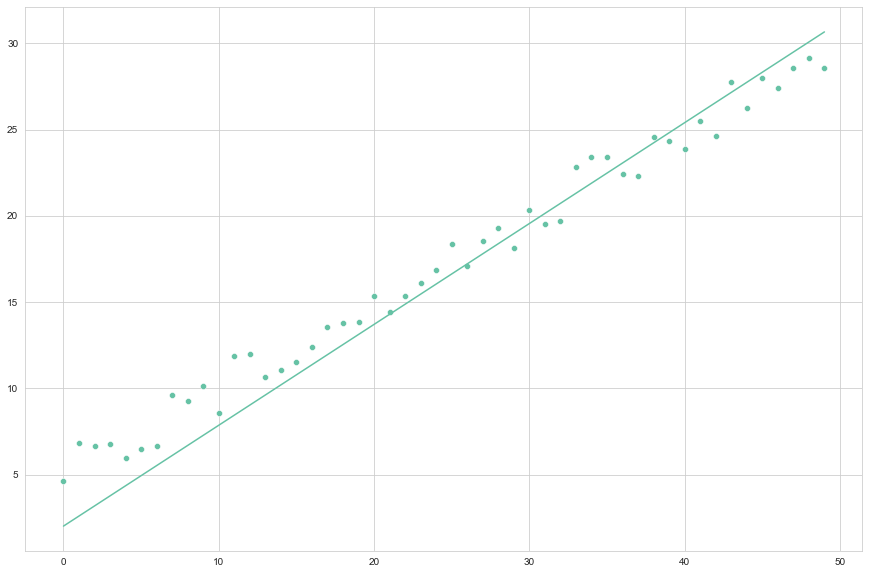

In [12]:
fig, ax = plt.subplots(figsize=(15,10))

y_pred = w1*X[:,0] + w2*X[:,1] + w3
sns.scatterplot(x=x, y=y, ax=ax)
sns.lineplot(x=x, y=y_pred, ax=ax)


## Plot Trend Line & Loss Optimization with a Small Learning Rate

## Plot Trend Line & Loss Optimization with a Large Learning Rate

In [15]:
reg = LinearRegression().fit(X_train, y_train)
reg.score(X_test, y_test)
y_pred = reg.predict(X_test)
mean_squared_error(y_test, y_pred)
reg.coef_


NameError: name 'LinearRegression' is not defined

## SKLearn Linear Regression

In [24]:
from sklearn.linear_model import LinearRegression

We'll be using another dataset for the regression task since we need continuous values as labels / outputs / targets. One readily-available dataset for this is the **Boston dataset**. It contains the house pricing data in Boston as well as the following features:

 - CRIM per capita crime rate by town
 - ZN proportion of residential land zoned for lots over 25,000 sq.ft.
 - INDUS proportion of non-retail business acres per town
 - CHAS Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 - NOX nitric oxides concentration (parts per 10 million)
 - RM average number of rooms per dwelling
 - AGE proportion of owner-occupied units built prior to 1940
 - DIS weighted distances to five Boston employment centres
 - RAD index of accessibility to radial highways
 - TAX full-value property-tax rate per \$10,000
 - PTRATIO pupil-teacher ratio by town
 - B 1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 - LSTAT % lower status of the population
 - MEDV Median value of owner-occupied homes in $1000’s


In [25]:
X, y = datasets.load_boston(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(f"Original Size | Input: {X.shape}, Output: {y.shape}")
print(f"Train Set Size | Input: {X_train.shape}, Output: {y_train.shape}")
print(f"Test Set Size | Input: {X_test.shape}, Output: {y_test.shape}")

Original Size | Input: (506, 13), Output: (506,)
Train Set Size | Input: (404, 13), Output: (404,)
Test Set Size | Input: (102, 13), Output: (102,)


## Check feature importance

NameError: name 'reg' is not defined

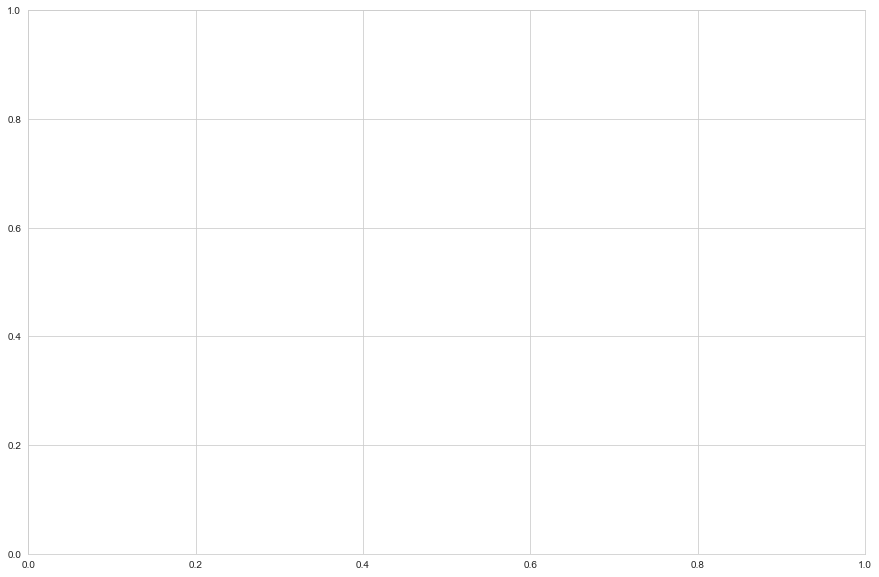

In [14]:
cols = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX', 'PTRATIO', 'B 1000', 'LSTAT %']
fig, ax = plt.subplots(figsize=(15,10))
sns.barplot(x=reg.coef_, y=cols)

for p in ax.patches:
    width = p.get_width()    # get bar length
    ax.text(width - .5,       # set the text at 1 unit right of the bar
            p.get_y() + p.get_height() / 2, # get Y coordinate + X coordinate / 2
            '{:1.2f}'.format(width), # set variable to display, 2 decimals
            ha = 'left',   # horizontal alignment
            va = 'center',
            fontsize=13)  # vertical alignment


## Plot Trend Line

## Linear Regression using ScipyStats

If you are getting a module not found error you might have to install the scipy package. Run the command be low on your anaconda shell to install the package.

`conda install -c conda-forge statsmodels`

In [4]:
import statsmodels.api as sm

In [14]:
import statsmodels.formula.api as smf
import statsmodels.api as sm

reg =  sm.OLS(y_train, X_train).fit()
reg.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                      y   R-squared (uncentered):                   0.962
Model:                            OLS   Adj. R-squared (uncentered):              0.960
Method:                 Least Squares   F-statistic:                              755.7
Date:                Mon, 01 Nov 2021   Prob (F-statistic):                   1.13e-267
Time:                        21:59:28   Log-Likelihood:                         -1208.5
No. Observations:                 404   AIC:                                      2443.
Df Residuals:                     391   BIC:                                      2495.
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
x1            -0.1005      0.036     -2.799      0.005      -0.171      -0.030
x2             0.0342      0.017      2.068      0.039       0.002       0.067
x3             0.0336      0.070      0.482      0.630      -0.103       0.171
x4             2.7397      0.989      2.771      0.006       0.796       4.683
x5            -5.1551      3.706     -1.391      0.165     -12.440       2.130
x6             6.1960      0.338     18.352      0.000       5.532       6.860
x7            -0.0111      0.015     -0.737      0.462      -0.041       0.018
x8            -1.0200      0.218     -4.669      0.000      -1.450      -0.591
x9             0.1388      0.075      1.855      0.064      -0.008       0.286
x10           -0.0078      0.004     -1.790      0.074      -0.016       0.001
x11           -0.4541      0.119     -3.815      0.000      -0.688      -0.220
x12            0.0168      0.003      5.728      0.000       0.011       0.023
x13           -0.4259      0.055     -7.699      0.000      -0.535      -0.317
==============================================================================
Omnibus:                      154.481   Durbin-Watson:                   2.089
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1082.869
Skew:                           1.452   Prob(JB):                    7.21e-236
Kurtosis:                      10.477   Cond. No.                     8.46e+03
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[3] The condition number is large, 8.46e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""